Projet pandas : analyse du taux de réussite au baccalauréat en fonction de la classe sociale

In [76]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv('fr-en-reussite-au-baccalaureat-origine-sociale.csv', sep = ";")
# Il y a des virgules dans le csv, on définit le séparateur ";"

à faire :

Résultats en fonction des années, à chaque bac (bac plus facile avec le temps?).

Regarder la variance pour déterminer la catégorie sociale la plus régulière

Résultats en fonction de la filière choisie.

Résultats en fonction de l'origine sociale pour chaque filière.

Nombre de candidats dans les filières en fonction des origines sociales (+ de bac techno pour les ouvriers par ex).

Faire des graphiques pour chaque origine sociale en fonction des années.

Nombre de candidats issue d'une origine sociale = indicateur du nb de gens dans cette catégorie sociale?

Idées bonus : 
Ajouter le revenu moyen de chaque milieu pour tracer les résultats en fonction des revenus

Mise en forme du dataframe avant de l'exploiter:

In [ ]:
# On ajoute les colonnes pour avoir le nombre total de candidats qui s'inscrivent au baccalauréat
df["nombre_candidats_au_baccalaureat_general"] = np.floor((100/df["pourcentage_d_admis_au_baccalaureat_general"])*df['nombre_d_admis_au_baccalaureat_general'])
df["nombre_candidats_au_baccalaureat_technologique"] = np.floor((100/df["pourcentage_d_admis_au_baccalaureat_technologique"])*df['nombre_d_admis_au_baccalaureat_technologique'])
df["nombre_candidats_au_baccalaureat_professionnel"] = np.floor((100/df["pourcentage_d_admis_au_baccalaureat_professionnel"])*df['nombre_d_admis_au_baccalaureat_professionnel'])
df["nombre_candidats_au_baccalaureat"] = np.floor((100/df["pourcentage_d_admis_au_baccalaureat"])*df['nombre_d_admis_au_baccalaureat'])

#print(df.isna().sum()) # pas de valeurs manquantes
print(df["origine_sociale"].unique())


# On renomme les catégorie sociales pour faciliter la lecture
df.loc[df['origine_sociale'] == 'Cadres, professions intellectuelles supérieures : professeurs et assimilés', ['origine_sociale']] = "Professeurs et assimilés"
df.loc[df['origine_sociale'] == 'Professions intermédiaires : instituteurs et assimilés', ['origine_sociale']] = "Instituteurs et assimilés"


by_origine = df.groupby(["origine_sociale"])
by_annee = df.groupby(["annee"])


['Autres personnes sans activité professionnelle'
 'Cadres, professions intellectuelles supérieures : professeurs et assimilés'
 'Indéterminé' 'Retraités' "Artisans, commerçants, chefs d'entreprise"
 'Employés' 'Ouvriers' 'Professions intermédiaires' 'Ensemble'
 'Cadres, professions intellectuelles supérieures'
 'Professions intermédiaires : instituteurs et assimilés'
 'Agriculteurs exploitants']
['Autres personnes sans activité professionnelle'
 'Professeurs et assimilés' 'Indéterminé' 'Retraités'
 "Artisans, commerçants, chefs d'entreprise" 'Employés' 'Ouvriers'
 'Professions intermédiaires' 'Ensemble'
 'Cadres, professions intellectuelles supérieures'
 'Instituteurs et assimilés' 'Agriculteurs exploitants']


Pourcentage d'admis au baccalauréat par année

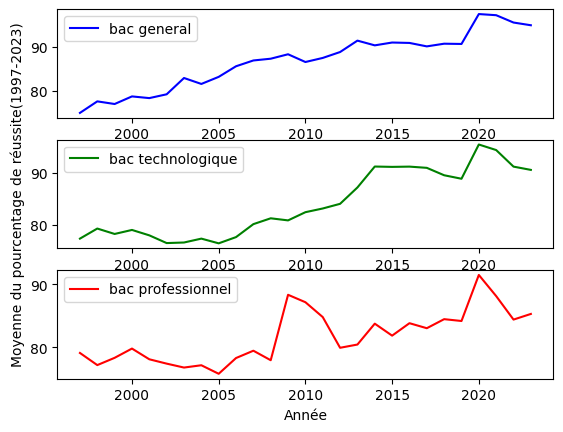

In [79]:
fig_gen = plt.subplot(311)
by_annee['pourcentage_d_admis_au_baccalaureat_general'].mean().plot(color = "b",
                                                                    label = "bac general"
                                                                    )
plt.legend()


fig_tech = plt.subplot(312)
by_annee['pourcentage_d_admis_au_baccalaureat_technologique'].mean().plot(color = "g",
                                                                          label = "bac technologique"
                                                                          )
plt.ylabel("Moyenne du pourcentage de réussite(1997-2023)")
plt.legend()

fig_pro = plt.subplot(313)
by_annee['pourcentage_d_admis_au_baccalaureat_professionnel'].mean().plot(color = "r",
                                                                          label = "bac professionnel"
                                                                          )
plt.legend()

plt.xlabel("Année")
plt.show()


On regarde quelle catégorie sociale a les résulats les plus réguliers en calculant la variance

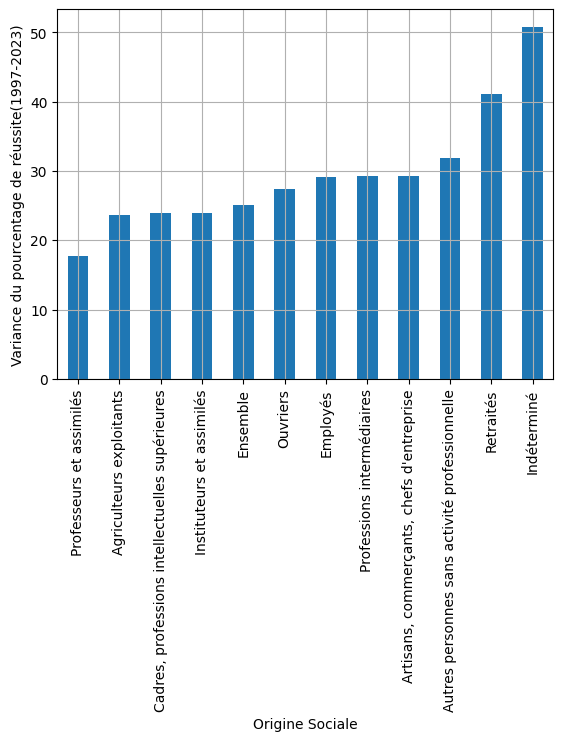

In [80]:
variance_cat = by_origine['pourcentage_d_admis_au_baccalaureat'].var().sort_values()
variance_cat.plot.bar()
plt.xlabel("Origine Sociale")
plt.ylabel("Variance du pourcentage de réussite(1997-2023)")
plt.grid()
plt.show()

Pourcentage de réussite au baccalauréat en fonction de l'origine sociale: 

On distingue les différents baccalauréats 

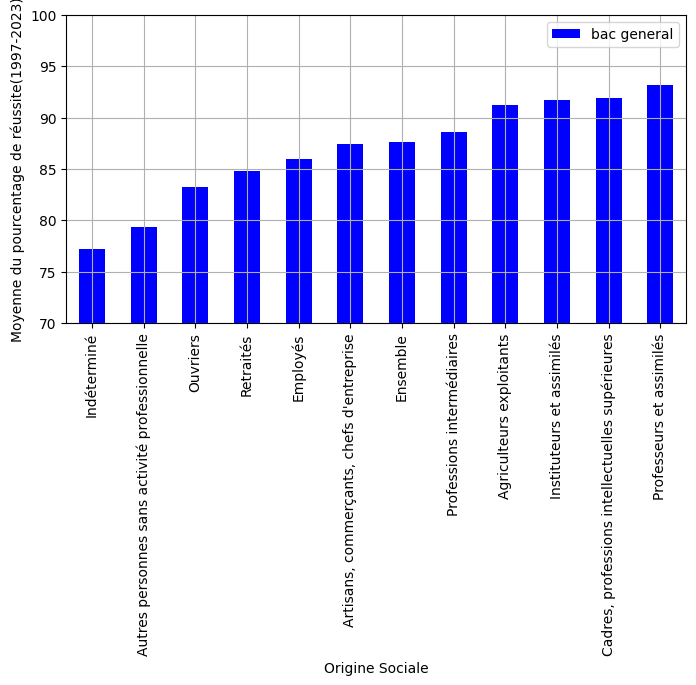

In [81]:

by_origine['pourcentage_d_admis_au_baccalaureat_general'].mean().sort_values().plot.bar(figsize=(8,4),
                                                                                        color = "b",
                                                                                        ylim =(70,100),
                                                                                        label = "bac general"
                                                                                        )
plt.xlabel("Origine Sociale")
plt.ylabel("Moyenne du pourcentage de réussite(1997-2023)")
plt.legend()
plt.grid()
plt.show()

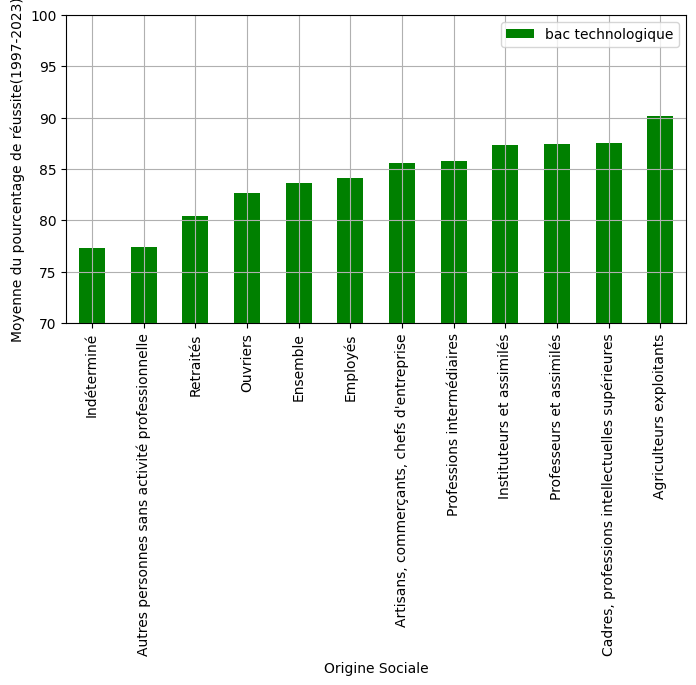

In [82]:
by_origine['pourcentage_d_admis_au_baccalaureat_technologique'].mean().sort_values().plot.bar(figsize=(8,4),
                                                                                              color = "g",
                                                                                              ylim =(70,100),
                                                                                              label = "bac technologique"
                                                                                              )
plt.xlabel("Origine Sociale")
plt.ylabel("Moyenne du pourcentage de réussite(1997-2023)")
plt.legend()
plt.grid()
plt.show()

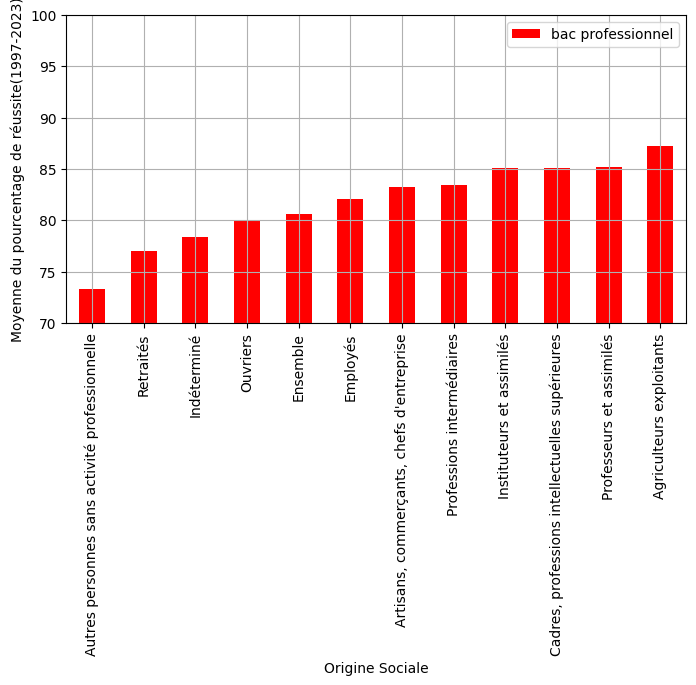

In [83]:
by_origine['pourcentage_d_admis_au_baccalaureat_professionnel'].mean().sort_values().plot.bar(figsize=(8,4), 
                                                                                              color = "r",
                                                                                              ylim =(70,100),
                                                                                              label = "bac professionnel"
                                                                                              )
plt.xlabel("Origine Sociale")
plt.ylabel("Moyenne du pourcentage de réussite(1997-2023)")
plt.legend()
plt.grid()
plt.show()

Proportion de candidats au baccalauréat en 2023 en fonction de l'origine sociale

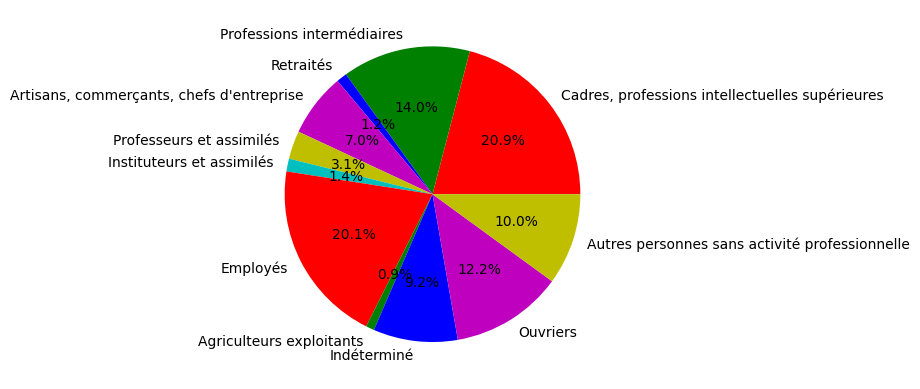

In [84]:
df_2023 = df[df['annee'] == 2023]
df_2023 = df_2023[df_2023["origine_sociale"] != "Ensemble"] #On supprime la ligne ensemble qui contient est le groupement des autres

plt.pie(
    df_2023['nombre_candidats_au_baccalaureat'],
    labels=df_2023['origine_sociale'],
    autopct='%1.1f%%',  # Pourcentages
    colors = ["r","g","b","m","y","c"]
)

plt.show()


Ce graphique nous donne une bonne représentation de la taille de chaque catégorie sociale en 2023, à ceci près qu'il néglige la part d'élèves ayant arrété les études avant le bac.

Nous allons exporer une potentielle corrélation entre les revenus moyens et les résultats au baccalauréat:

On commence par construire un dictionnaire contenant les revenus mensuels moyens pour chaque origine sociale (chiffres récupérées sur le site de INSEE, pour l'année 2022)

C:\Users\drumm\AppData\Local\Temp\ipykernel_25432\1995142930.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022["salaire_moyen"] = df_2022["origine_sociale"].map(salaire)


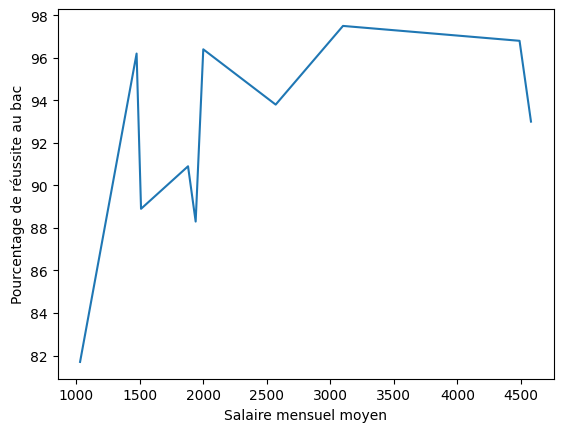

In [103]:
salaire = {"Employés":1880,
           "Ouvriers":1940,
           "Indéterminé":None, # On retire cette colonne par manque d'information
           "Agriculteurs exploitants":1475,
           "Cadres, professions intellectuelles supérieures":4490,
           "Professions intermédiaires":2570,
           "Retraités":1510,
           "Artisans, commerçants, chefs d'entreprise":4580,
           "Professeurs et assimilés":3100, # Les salaires pour les professeurs et instituteurs ne sont pas vérifiées, ceci varie énormément en fonction du niveau d'ancienneté
           "Instituteurs et assimilés":2000, # On laisse ces valeurs approximatives pour pouvoir continuer
           "Autres personnes sans activité professionnelle":1030
           }

df_2022 = df[df['annee'] == 2022] # On s'intéresse à l'année correspondant aux valeurs récupérées
df_2022["salaire_moyen"] = df_2022["origine_sociale"].map(salaire)
df_2022_1 = df_2022[["origine_sociale","salaire_moyen","pourcentage_d_admis_au_baccalaureat"]].sort_values(by = "salaire_moyen")

plt.plot(df_2022_1["salaire_moyen"],df_2022_1["pourcentage_d_admis_au_baccalaureat"])
plt.xlabel("Salaire mensuel moyen")
plt.ylabel("Pourcentage de réussite au bac")
plt.show()

La courbe obtenue ne révèle pas de corrélation directe entre le salaire et la réussite au baccalauréat.